In [1]:
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
#from ipynb.fs.full.Hide import hide_toggle # this function has to be in the same directory!
# pip install finta!!! the only site that has inverse fisher transform!

In [2]:
symbol ="TSLA"
num_name= symbol.split(' ') 
df = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2020-05-01",end="2021-02-09")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        df.append(data)

df[0]

,Date,Open,High,Low,Close
Date,,,,,
2020-04-30,18382.0,171.037994,173.964005,152.699997,156.376007
2020-05-01,18383.0,151.000000,154.554001,136.608002,140.264008
2020-05-04,18386.0,140.199997,152.399994,139.600006,152.238007
2020-05-05,18387.0,157.957993,159.783997,152.436005,153.641998
2020-05-06,18388.0,155.300003,157.960007,152.222000,156.516006
...,...,...,...,...,...
2021-02-02,18660.0,844.679993,880.500000,842.200012,872.789978
2021-02-03,18661.0,877.020020,878.080017,853.059998,854.690002
2021-02-04,18662.0,855.000000,856.500000,833.419983,849.989990


In [3]:
df[0]['12EMA'] = talib.EMA(df[0]['Close'], timeperiod = 12)
df[0]['26EMA'] = talib.EMA(df[0]['Close'], timeperiod = 26)
#data_frames_separate[0][['Close','12EMA','26EMA']].plot(figsize=(12,10))
df[0]

,Date,Open,High,Low,Close,12EMA,26EMA
Date,,,,,,,
2020-04-30,18382.0,171.037994,173.964005,152.699997,156.376007,NaN,NaN
2020-05-01,18383.0,151.000000,154.554001,136.608002,140.264008,NaN,NaN
2020-05-04,18386.0,140.199997,152.399994,139.600006,152.238007,NaN,NaN
2020-05-05,18387.0,157.957993,159.783997,152.436005,153.641998,NaN,NaN
2020-05-06,18388.0,155.300003,157.960007,152.222000,156.516006,NaN,NaN
...,...,...,...,...,...,...,...
2021-02-02,18660.0,844.679993,880.500000,842.200012,872.789978,840.313155,796.869302
2021-02-03,18661.0,877.020020,878.080017,853.059998,854.690002,842.524978,801.152317
2021-02-04,18662.0,855.000000,856.500000,833.419983,849.989990,843.673441,804.769922


In [6]:
df[0]["MACDLine"]= df[0]['12EMA']-df[0]['26EMA']
df[0]['SignalLine'] = talib.EMA(df[0]["MACDLine"], timeperiod = 9)


In [8]:
df[0]

,Date,Open,High,Low,Close,12EMA,26EMA,MACDLine,SignalLine
Date,,,,,,,,,
2020-04-30,18382.0,171.037994,173.964005,152.699997,156.376007,NaN,NaN,NaN,NaN
2020-05-01,18383.0,151.000000,154.554001,136.608002,140.264008,NaN,NaN,NaN,NaN
2020-05-04,18386.0,140.199997,152.399994,139.600006,152.238007,NaN,NaN,NaN,NaN
2020-05-05,18387.0,157.957993,159.783997,152.436005,153.641998,NaN,NaN,NaN,NaN
2020-05-06,18388.0,155.300003,157.960007,152.222000,156.516006,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-02-02,18660.0,844.679993,880.500000,842.200012,872.789978,840.313155,796.869302,43.443854,52.633025
2021-02-03,18661.0,877.020020,878.080017,853.059998,854.690002,842.524978,801.152317,41.372662,50.380952
2021-02-04,18662.0,855.000000,856.500000,833.419983,849.989990,843.673441,804.769922,38.903519,48.085466


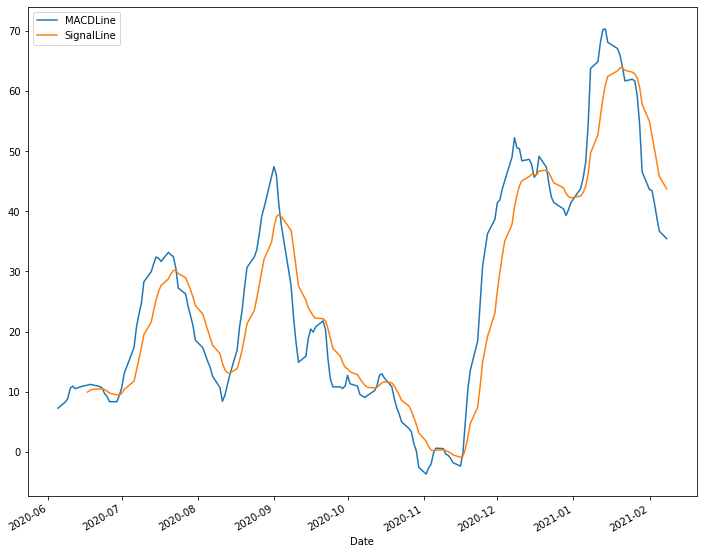

In [9]:
df[0][['MACDLine','SignalLine']].plot(figsize=(12,10))
plt.show()

In [12]:
def plotMACD(num):
    
  fig = plt.figure(figsize=(12,8))
  gs = gridspec.GridSpec(2, 1, height_ratios = [2,1]) 
  ax_stock= plt.subplot(gs[0])    
  plt.title(num_name[num])

  candlestick_ohlc(ax_stock,df[num].values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
    
  ax_MACD= plt.subplot(gs[1])
 
  ax_MACD.plot(data.index,df[0]["MACDLine"] )
  ax_MACD.plot(data.index,df[0]["SignalLine"] )
  

  legend_labels= ["overbought", "oversold","rsi"]
  ax_MACD.legend(legend_labels,loc = 2)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax_MACD.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  ax_stock.grid()
  #ax_rsi.grid()
# Removing the date labels and ticks from the price subplot:
  ax_stock.get_xaxis().set_visible(False)
# Removing the gap between the plots:
  fig.subplots_adjust(hspace=0)
# Adding a horizontal line at the zero level in the ROC subplot:
  ax_MACD.axhline(20, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)
# We can add labels to both vertical axis:
  ax_stock.set_ylabel("Price ($)")
  ax_MACD.set_ylabel("MACD")


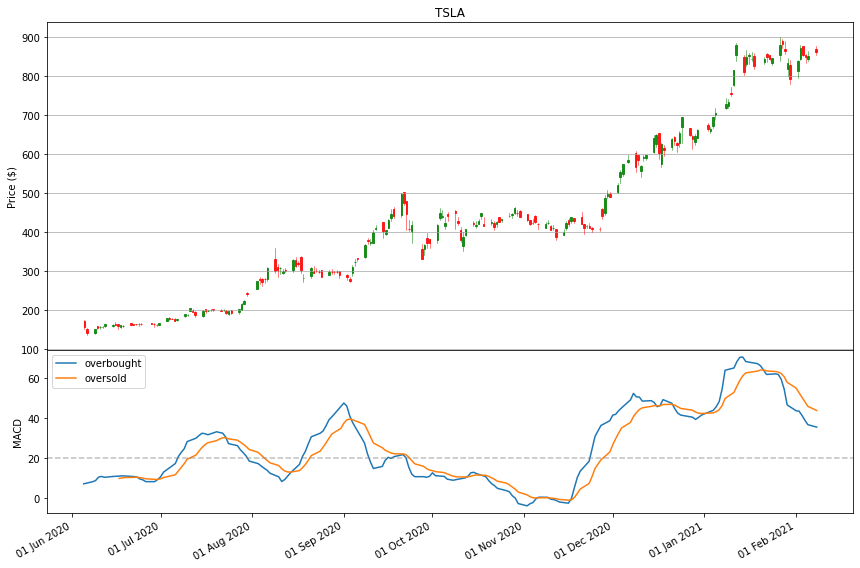

In [13]:
plotMACD(0)